<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/hpdp/BERUK/case_study1/cs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Select a real-world dataset
https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv

## Step 2: Perform data preparation & cleaning

#### Importing necessary libraries to use on the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime

#### Load the dataset into a data frame using Pandas

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv")
df.head(17)

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-25,Pahang,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-01-25,Perak,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-01-25,Perlis,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-01-25,Pulau Pinang,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-01-25,Sabah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Explore the number of rows & columns, ranges of values etc.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22176 entries, 0 to 22175
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              22176 non-null  object
 1   state             22176 non-null  object
 2   cases_new         22176 non-null  int64 
 3   cases_import      22176 non-null  int64 
 4   cases_recovered   22176 non-null  int64 
 5   cases_active      22176 non-null  int64 
 6   cases_cluster     22176 non-null  int64 
 7   cases_unvax       22176 non-null  int64 
 8   cases_pvax        22176 non-null  int64 
 9   cases_fvax        22176 non-null  int64 
 10  cases_boost       22176 non-null  int64 
 11  cases_child       22176 non-null  int64 
 12  cases_adolescent  22176 non-null  int64 
 13  cases_adult       22176 non-null  int64 
 14  cases_elderly     22176 non-null  int64 
 15  cases_0_4         22176 non-null  int64 
 16  cases_5_11        22176 non-null  int64 
 17  cases_12_17 

#### Handle missing, incorrect and invalid data

##### Checking for null values

In [4]:
df.isnull().sum(axis=0)

date                0
state               0
cases_new           0
cases_import        0
cases_recovered     0
cases_active        0
cases_cluster       0
cases_unvax         0
cases_pvax          0
cases_fvax          0
cases_boost         0
cases_child         0
cases_adolescent    0
cases_adult         0
cases_elderly       0
cases_0_4           0
cases_5_11          0
cases_12_17         0
cases_18_29         0
cases_30_39         0
cases_40_49         0
cases_50_59         0
cases_60_69         0
cases_70_79         0
cases_80            0
dtype: int64

##### Check for duplicate values

In [5]:
df[df.duplicated()]

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80


##### Converting column 'date' from object to datetime

In [6]:
df['date'] = pd.to_datetime(df['date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22176 entries, 0 to 22175
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              22176 non-null  datetime64[ns]
 1   state             22176 non-null  object        
 2   cases_new         22176 non-null  int64         
 3   cases_import      22176 non-null  int64         
 4   cases_recovered   22176 non-null  int64         
 5   cases_active      22176 non-null  int64         
 6   cases_cluster     22176 non-null  int64         
 7   cases_unvax       22176 non-null  int64         
 8   cases_pvax        22176 non-null  int64         
 9   cases_fvax        22176 non-null  int64         
 10  cases_boost       22176 non-null  int64         
 11  cases_child       22176 non-null  int64         
 12  cases_adolescent  22176 non-null  int64         
 13  cases_adult       22176 non-null  int64         
 14  cases_elderly     2217

##### Create new column 'year_month' and create a new dataframe using 'year_month' as its index

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['month_year'] = df['date'].dt.to_period('M')

agg_df = df.groupby('month_year').agg({
    'state': 'first',
    'cases_new': 'sum',
    'cases_import': 'sum',
    'cases_recovered': 'sum',
    'cases_active': 'sum',
    'cases_cluster': 'sum',
    'cases_unvax': 'sum',
    'cases_pvax': 'sum',
    'cases_fvax': 'sum',
    'cases_boost': 'sum',
    'cases_child': 'sum',
    'cases_adolescent': 'sum',
    'cases_adult': 'sum',
    'cases_elderly': 'sum',
    'cases_0_4': 'sum',
    'cases_5_11': 'sum',
    'cases_12_17': 'sum',
    'cases_18_29': 'sum',
    'cases_30_39': 'sum',
    'cases_40_49': 'sum',
    'cases_50_59': 'sum',
    'cases_60_69': 'sum',
    'cases_70_79': 'sum',
    'cases_80': 'sum'
}).reset_index()

print(agg_df)

   month_year  state  cases_new  cases_import  cases_recovered  cases_active  \
0     2020-01  Johor          8             8                0            39   
1     2020-02  Johor         17            15               22           256   
2     2020-03  Johor       2741           276              514         23626   
3     2020-04  Johor       3236           512             3634         66282   
4     2020-05  Johor       1817           236             2182         43896   
5     2020-06  Johor        820           143             2001         23866   
6     2020-07  Johor        337           142              290          3672   
7     2020-08  Johor        364           174              410          5802   
8     2020-09  Johor       1884           144              913         17356   
9     2020-10  Johor      20324            96            11281        191717   
10    2020-11  Johor      34149           151            33511        355532   
11    2020-12  Johor      47313         

## Step 3: Perform exploratory analysis & visualization

#### Compute the mean, sum, range and other interesting statistics for numeric columns

##### Print average daily cases per states

In [8]:
average_values_all_columns = df[df.columns[:-1]].mean()

print("Average values for all columns:\n")
print(average_values_all_columns)

Average values for all columns:

cases_new            231.529717
cases_import           1.756764
cases_recovered      229.383523
cases_active        2802.130997
cases_cluster         23.986652
cases_unvax           91.212843
cases_pvax            19.663871
cases_fvax            62.328959
cases_boost           58.324044
cases_child           28.799378
cases_adolescent      14.549513
cases_adult          162.616567
cases_elderly         21.729843
cases_0_4             11.721230
cases_5_11            17.078148
cases_12_17           14.549513
cases_18_29           59.975108
cases_30_39           51.492695
cases_40_49           30.740981
cases_50_59           20.407783
cases_60_69           13.109848
cases_70_79            5.916757
cases_80               2.703148
dtype: float64


<ipython-input-8-1574f9404d96>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  average_values_all_columns = df[df.columns[:-1]].mean()
<ipython-input-8-1574f9404d96>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_values_all_columns = df[df.columns[:-1]].mean()


##### Print max value for daily cases per state

In [9]:
print("Max values for all columns:\n")
print(df[df.columns[2:-1]].max())

Max values for all columns:

cases_new            11692
cases_import           351
cases_recovered      12379
cases_active        103574
cases_cluster         1545
cases_unvax           6112
cases_pvax            3895
cases_fvax            3614
cases_boost           7652
cases_child           1506
cases_adolescent       647
cases_adult           8876
cases_elderly          863
cases_0_4              593
cases_5_11             913
cases_12_17            647
cases_18_29           3132
cases_30_39           2911
cases_40_49           1762
cases_50_59           1071
cases_60_69            571
cases_70_79            233
cases_80                82
dtype: int64


##### Print sum of cases

In [10]:
print("Average values for all columns:\n")
print(df[df.columns[2:]].sum())

Average values for all columns:

cases_new            5134403
cases_import           38958
cases_recovered      5086809
cases_active        62140057
cases_cluster         531928
cases_unvax          2022736
cases_pvax            436066
cases_fvax           1382207
cases_boost          1293394
cases_child           638655
cases_adolescent      322650
cases_adult          3606185
cases_elderly         481881
cases_0_4             259930
cases_5_11            378725
cases_12_17           322650
cases_18_29          1330008
cases_30_39          1141902
cases_40_49           681712
cases_50_59           452563
cases_60_69           290724
cases_70_79           131210
cases_80               59945
dtype: int64


<ipython-input-10-bc26989c3bb2>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df.columns[2:]].sum())


#### Explore relationship between columns using scatter plots, bar charts etc

##### Displaying some graphs regarding the cases

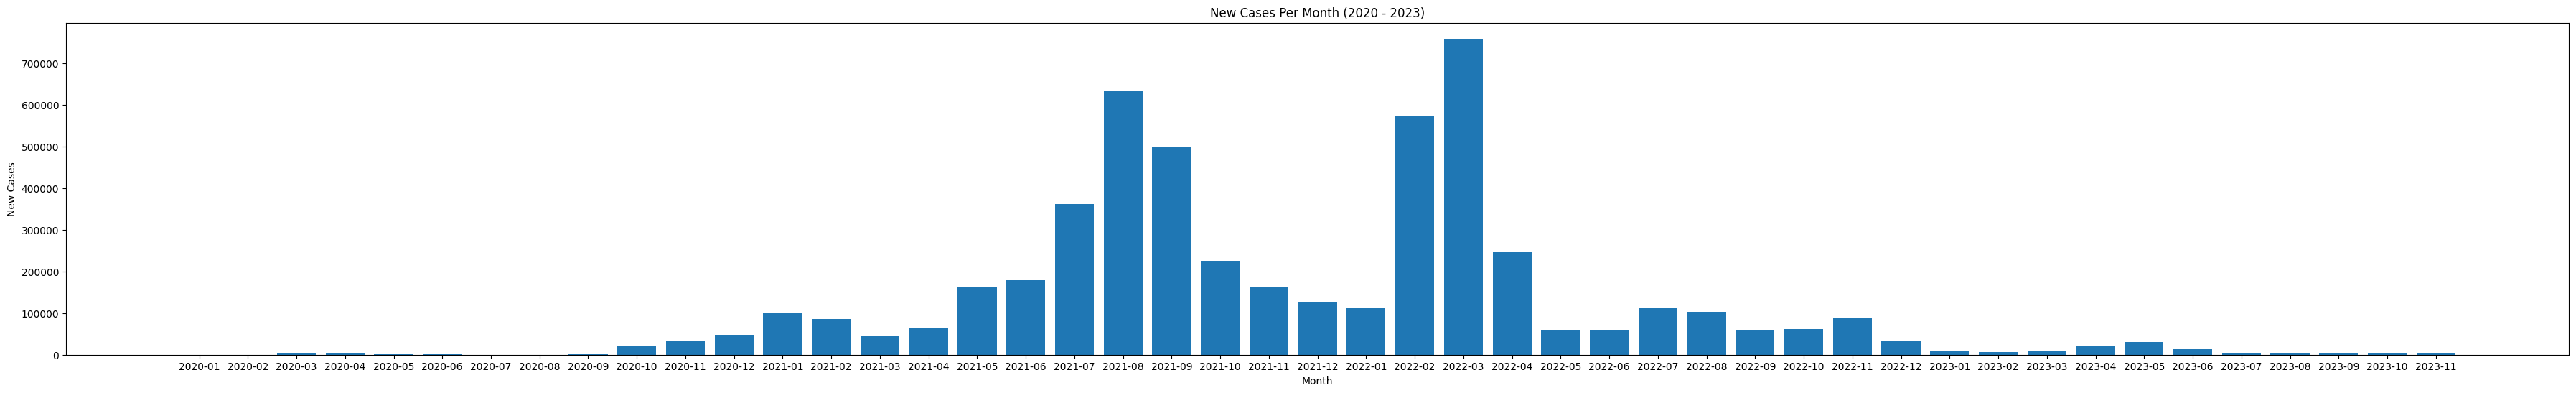

In [11]:
plt.figure(figsize=(45, 6))
plt.bar(agg_df['month_year'].astype(str), agg_df['cases_new'])

plt.xlabel('Month')
plt.ylabel('New Cases')
plt.title('New Cases Per Month (2020 - 2023)')

plt.show()

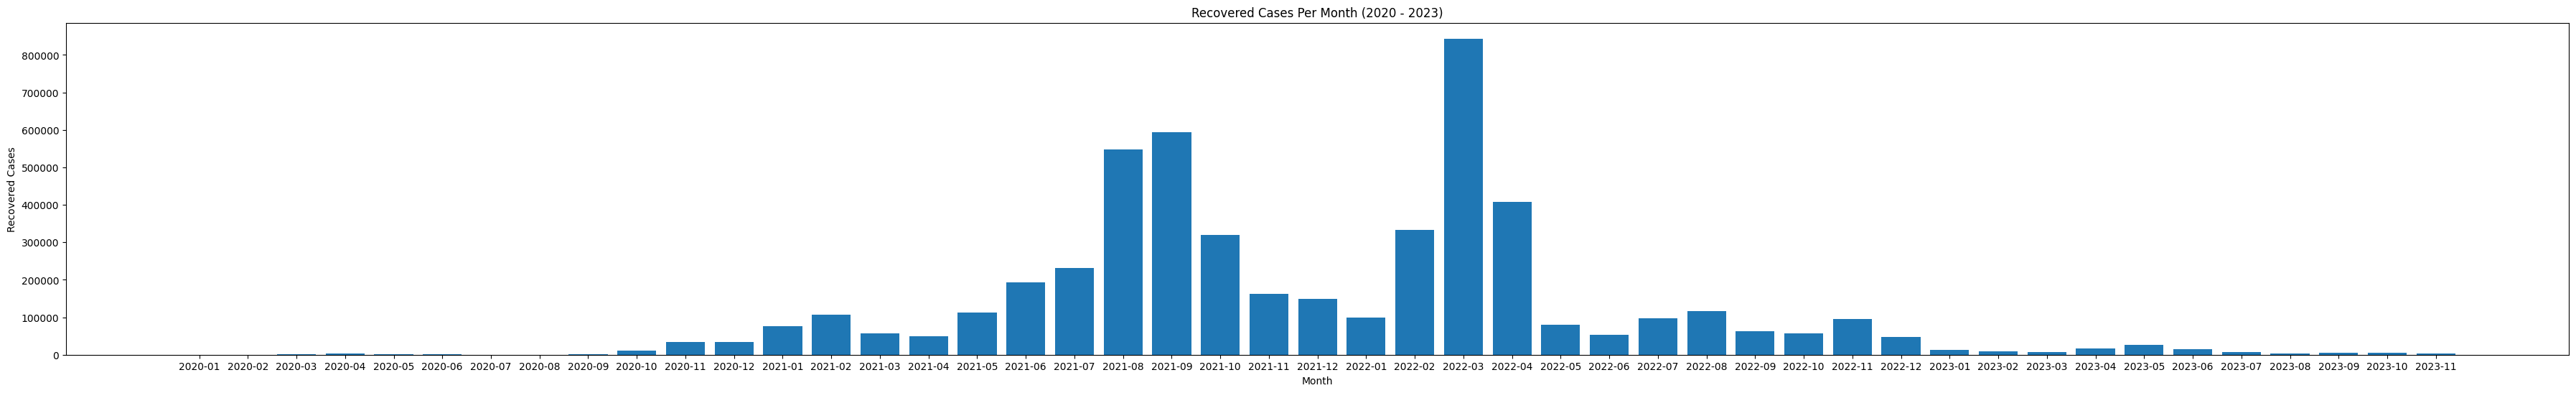

In [12]:
plt.figure(figsize=(45, 6))
plt.bar(agg_df['month_year'].astype(str), agg_df['cases_recovered'])

plt.xlabel('Month')
plt.ylabel('Recovered Cases')
plt.title('Recovered Cases Per Month (2020 - 2023)')

plt.show()

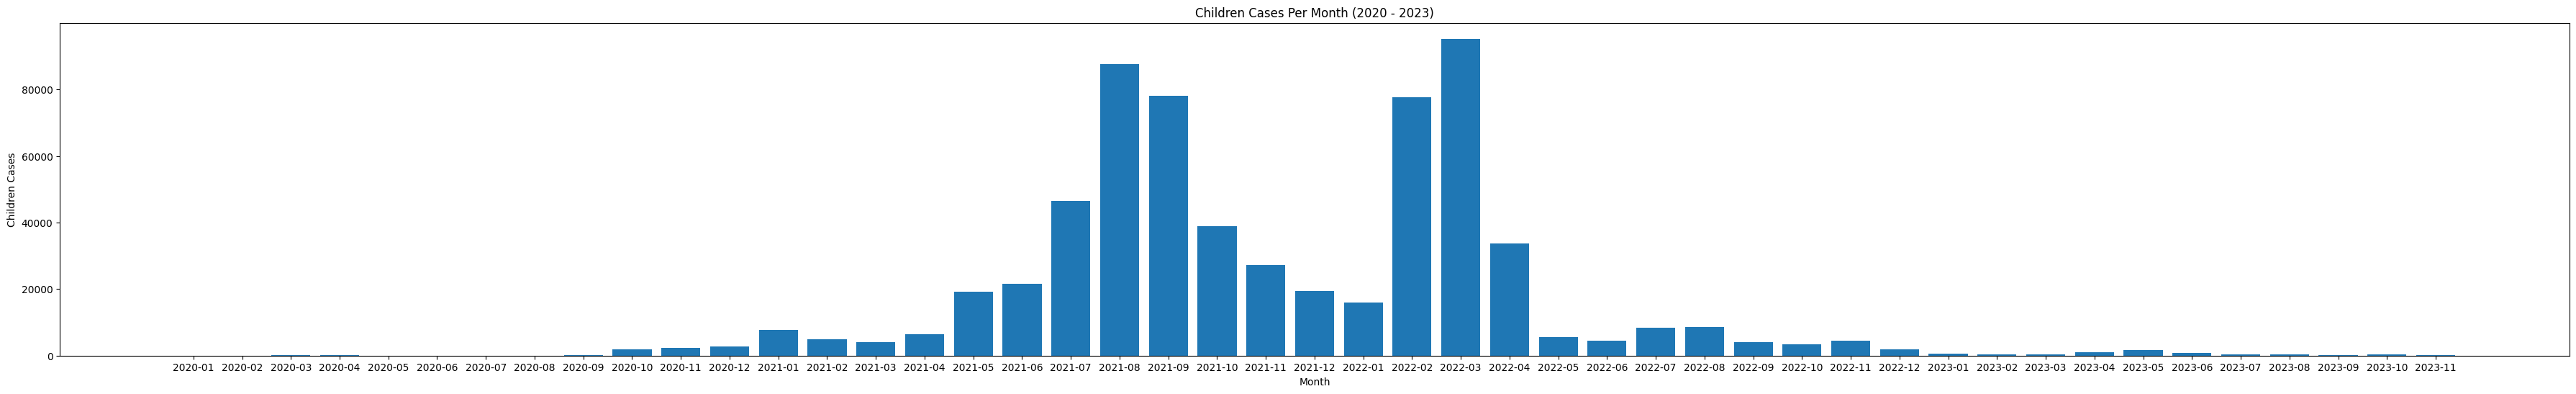

In [13]:
plt.figure(figsize=(45, 6))
plt.bar(agg_df['month_year'].astype(str), agg_df['cases_child'])

plt.xlabel('Month')
plt.ylabel('Children Cases')
plt.title('Children Cases Per Month (2020 - 2023)')

plt.show()

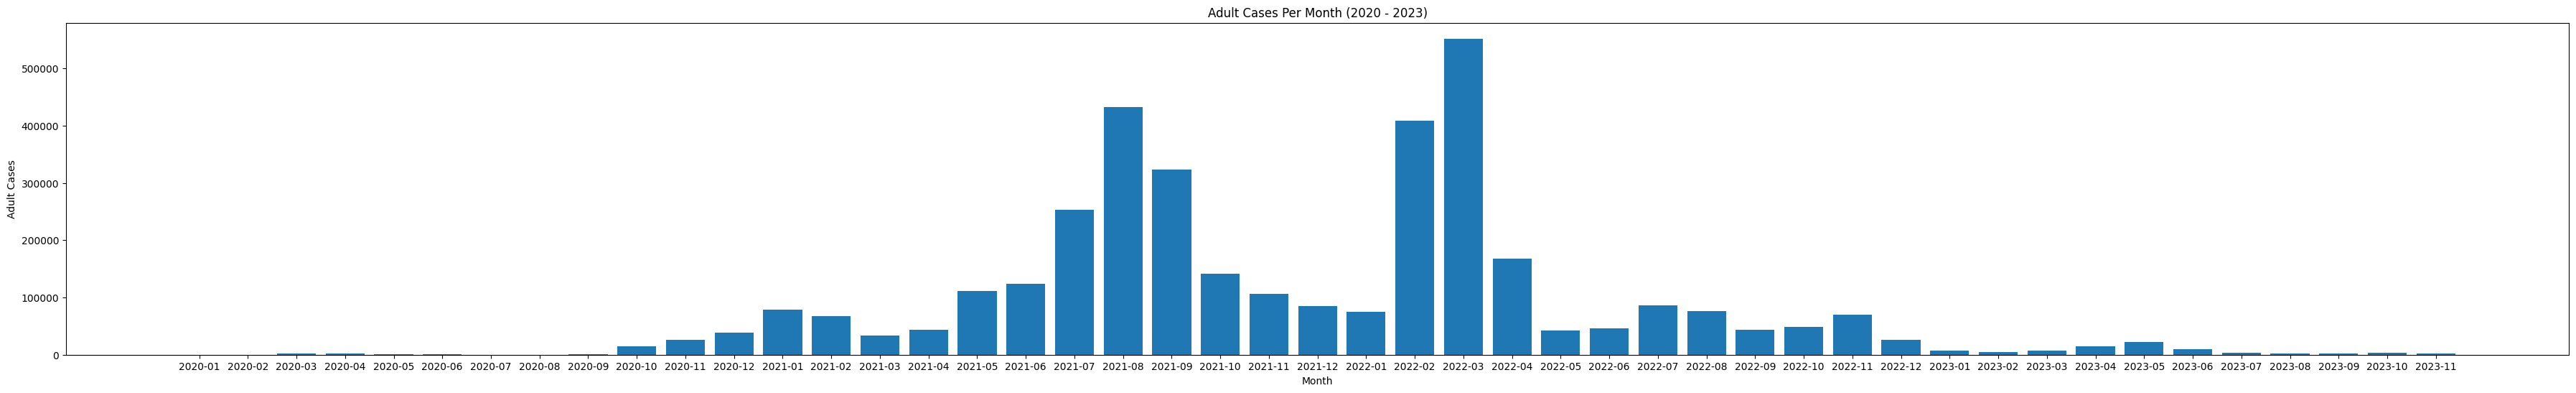

In [14]:
plt.figure(figsize=(45, 6))
plt.bar(agg_df['month_year'].astype(str), agg_df['cases_adult'])

plt.xlabel('Month')
plt.ylabel('Adult Cases')
plt.title('Adult Cases Per Month (2020 - 2023)')

plt.show()

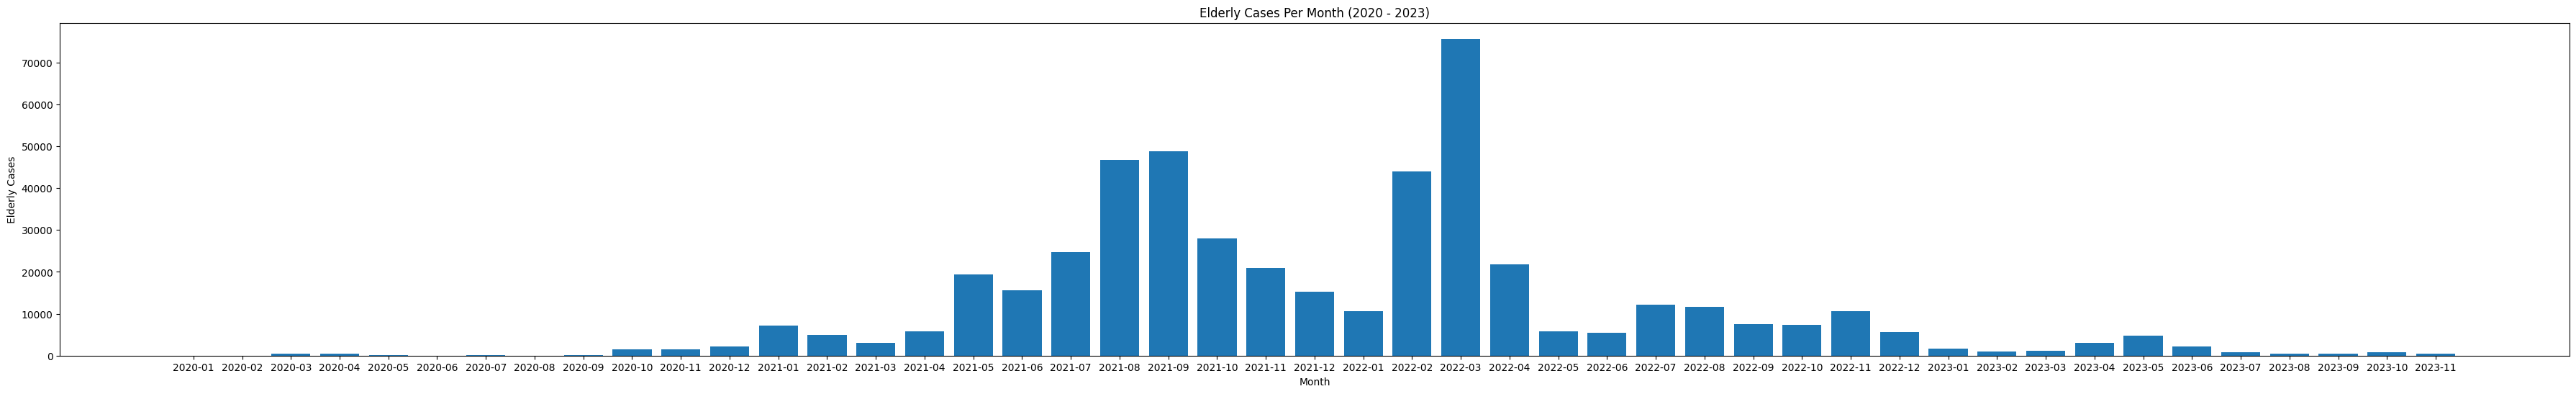

In [15]:
plt.figure(figsize=(45, 6))
plt.bar(agg_df['month_year'].astype(str), agg_df['cases_elderly'])

plt.xlabel('Month')
plt.ylabel('Elderly Cases')
plt.title('Elderly Cases Per Month (2020 - 2023)')

plt.show()

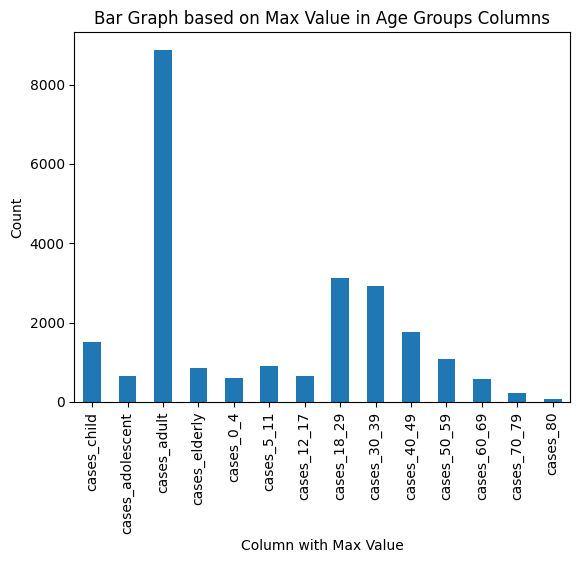

In [16]:
max_column_counts = df[df.columns[11:-1]].max()

max_column_counts.plot(kind='bar')
plt.xlabel('Column with Max Value')
plt.ylabel('Count')
plt.title('Bar Graph based on Max Value in Age Groups Columns')
plt.show()

#### Make a note of interesting insights from the exploratory analysis

- We can see that the number of cases are not affected by time but are occuring randomly throughout the months. However we can see number of cases spikes on August to September of 2021 and on March of 2022
- Most cases are adults, meaning that adults are more susceptible to Covid
- Least case appears on adolescents

### Step 4: Ask & answer questions about the data

1. Which state has the higest new cases recorded?

<ipython-input-17-018d22042dff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_cases_by_state = df.groupby('state').sum().reset_index()


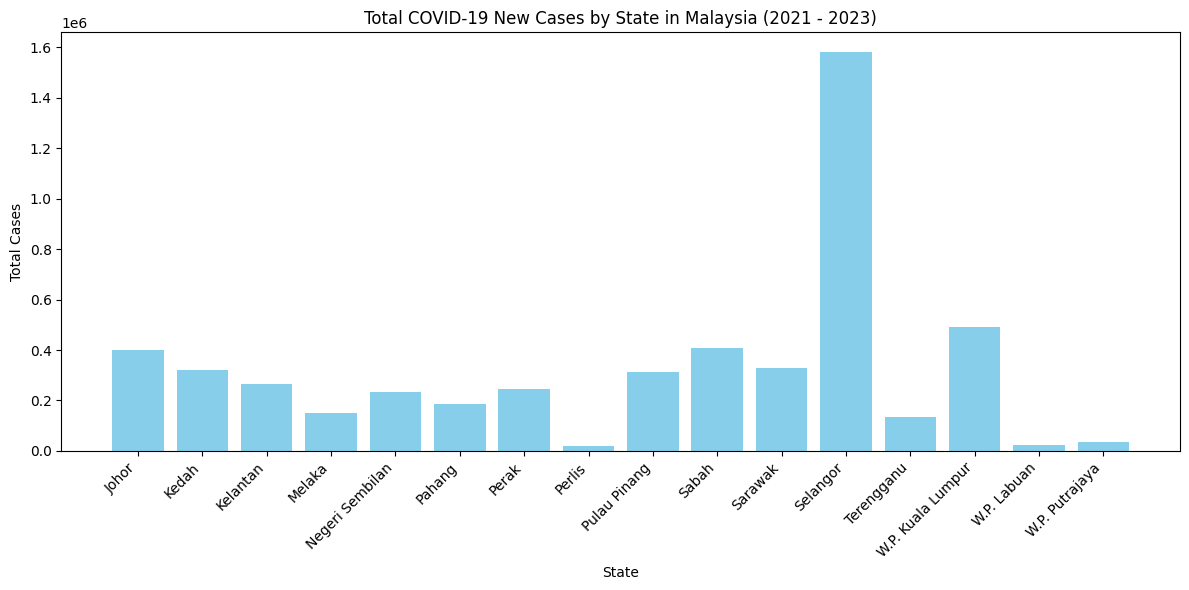

In [17]:
total_cases_by_state = df.groupby('state').sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(total_cases_by_state['state'], total_cases_by_state['cases_new'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 New Cases by State in Malaysia (2021 - 2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Answer : Selangor has the highest new cases recorded

2. Which state has the highest active case recorded?

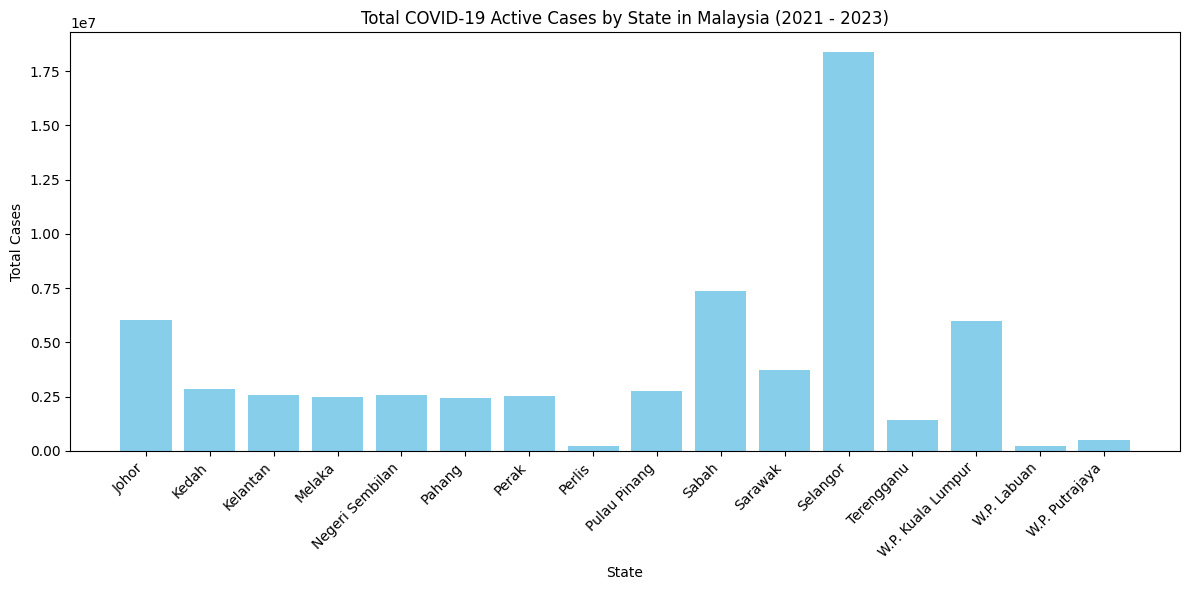

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(total_cases_by_state['state'], total_cases_by_state['cases_active'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Active Cases by State in Malaysia (2021 - 2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Answer : Selangor has the highest active recorded

3. Which state has the highest recovered cases recorded?

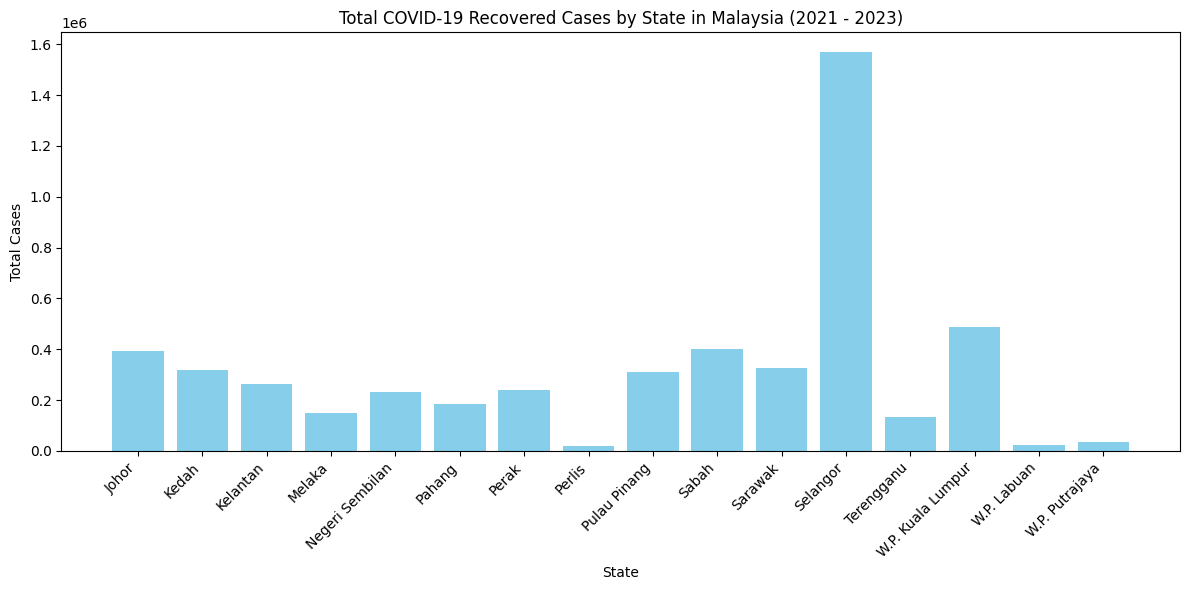

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(total_cases_by_state['state'], total_cases_by_state['cases_recovered'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Recovered Cases by State in Malaysia (2021 - 2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Answer : Selangor has the most recovered cases recorded

4. Is there a period where new cases increase significantly?

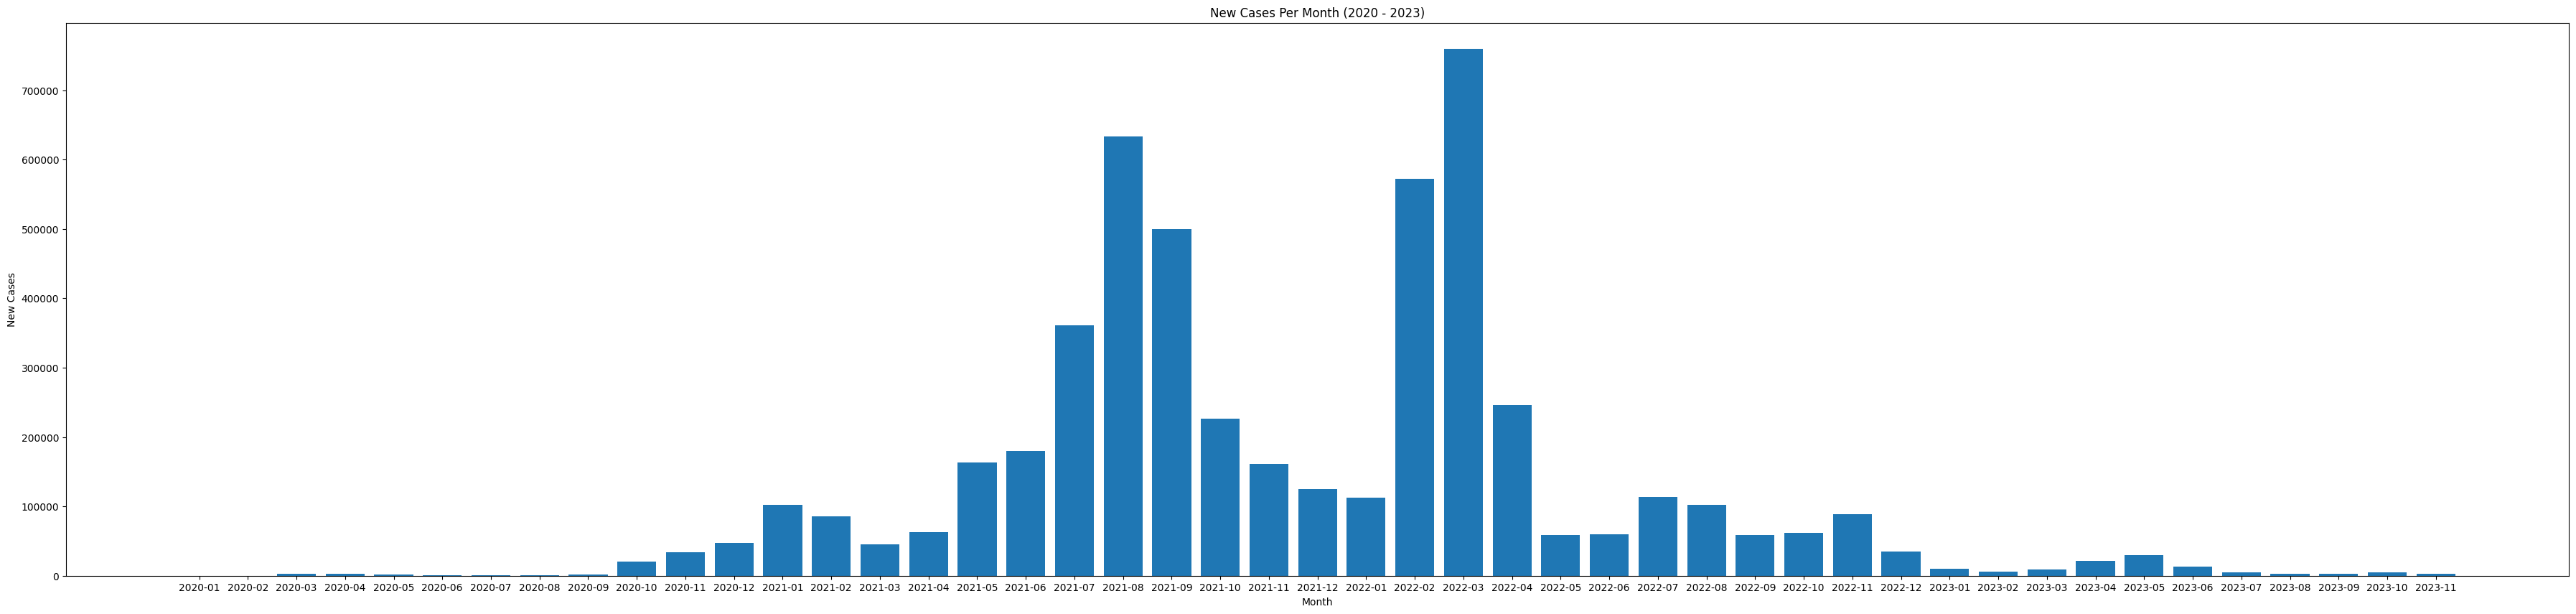

In [20]:
plt.figure(figsize=(45, 10))
plt.bar(agg_df['month_year'].astype(str), agg_df['cases_new'])

plt.xlabel('Month')
plt.ylabel('New Cases')
plt.title('New Cases Per Month (2020 - 2023)')

plt.show()

In [21]:
#Find the index of 2022-01
agg_df[agg_df == '2022-01'].stack().index.tolist()

[(24, 'month_year')]

In [22]:
#Calculate the value difference of the spike
print(agg_df.at[25, 'cases_new'] - agg_df.at[24, 'cases_new'])

459306


Answer : New cases have a sudden spike during February 2022 with the value difference of 459306

5. Is there a period where active cases increase significantly?

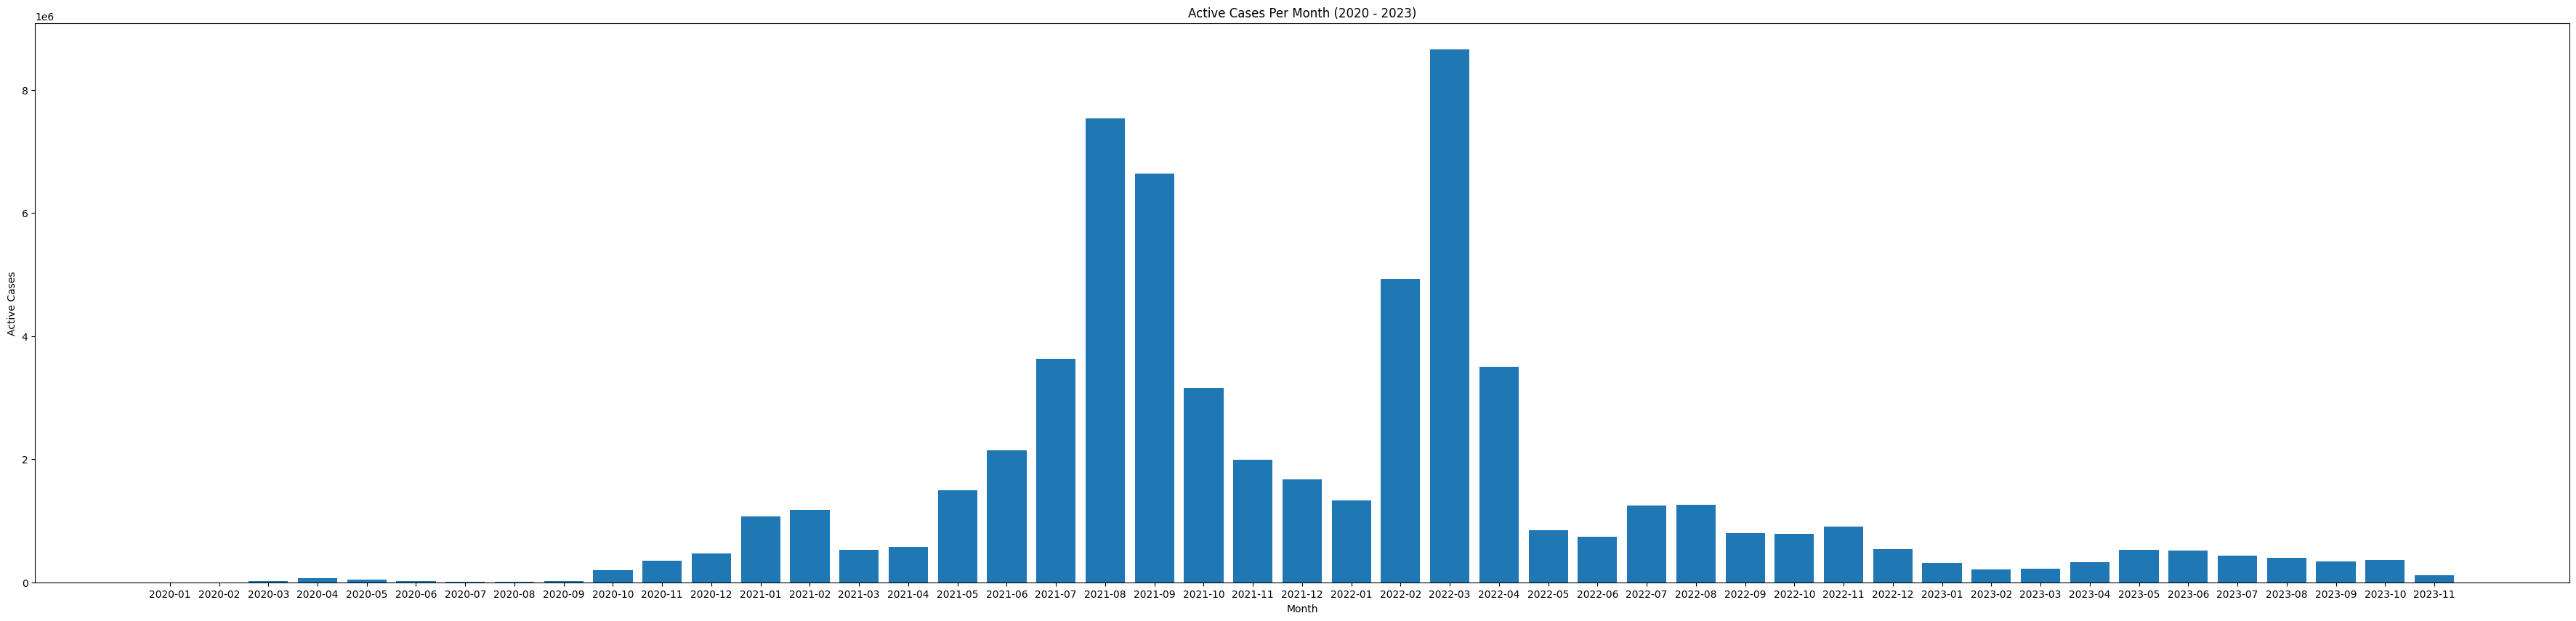

In [23]:
plt.figure(figsize=(45, 10))
plt.bar(agg_df['month_year'].astype(str), agg_df['cases_active'])

plt.xlabel('Month')
plt.ylabel('Active Cases')
plt.title('Active Cases Per Month (2020 - 2023)')

plt.show()

In [24]:
#Find the index of possible highest spike
print(agg_df[agg_df == '2022-01'].stack().index.tolist())
print(agg_df[agg_df == '2021-07'].stack().index.tolist())

[(24, 'month_year')]
[(18, 'month_year')]


In [25]:
#Calculate the value difference of the spike
print(agg_df.at[25, 'cases_active'] - agg_df.at[24, 'cases_active'])
print(agg_df.at[26, 'cases_active'] - agg_df.at[25, 'cases_active'])
print(agg_df.at[19, 'cases_active'] - agg_df.at[18, 'cases_active'])

3601135
3720937
3903078


Answer : Active cases have a sudden spike during August 2021 with the value difference of 3903078

6. What is the ratio of recovered cases to active cases, and how does this ratio evolve over the course of the dataset?

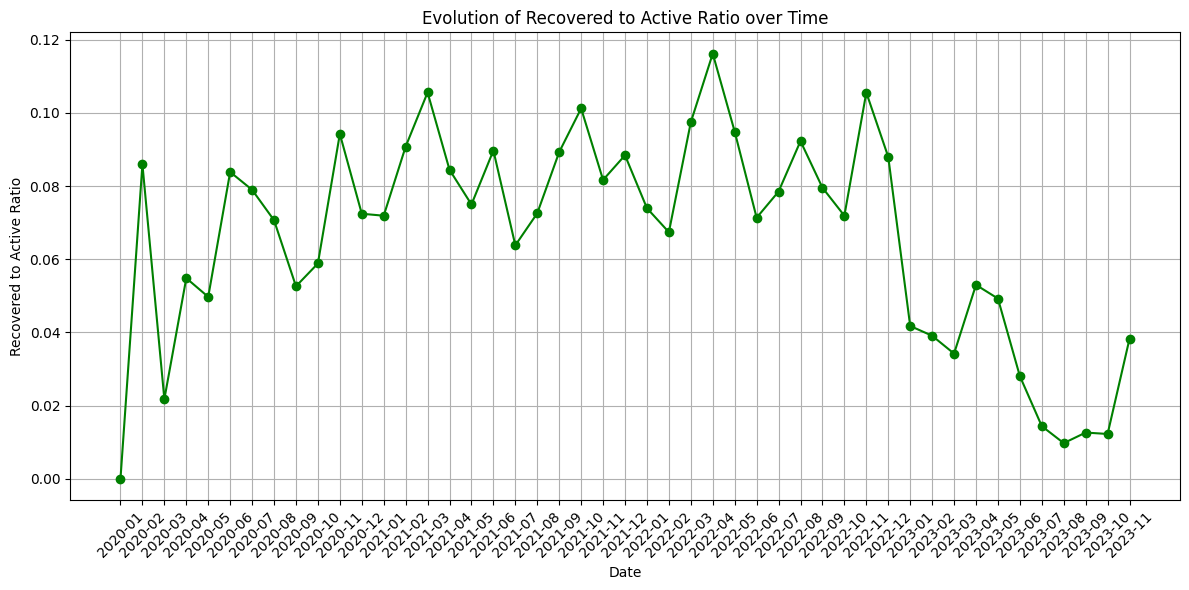

In [26]:
agg_df['recovered_to_active_ratio'] = agg_df['cases_recovered'] / agg_df['cases_active']

plt.figure(figsize=(12, 6))
plt.plot(agg_df['month_year'].astype(str), agg_df['recovered_to_active_ratio'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Recovered to Active Ratio')
plt.title('Evolution of Recovered to Active Ratio over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

7. Which age group has the highest recorded cases?

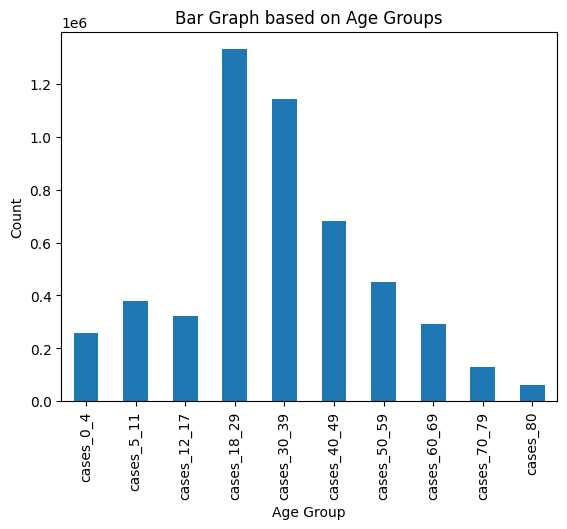

In [27]:
sum_column_counts = df[df.columns[15:-1]].sum()

sum_column_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar Graph based on Age Groups')
plt.show()

Answer : Highest recorded cases is in the age group of 18 - 29 years old

8. What is the overall trend in new COVID-19 cases over time in Malaysia, and are there specific dates or periods that stand out?

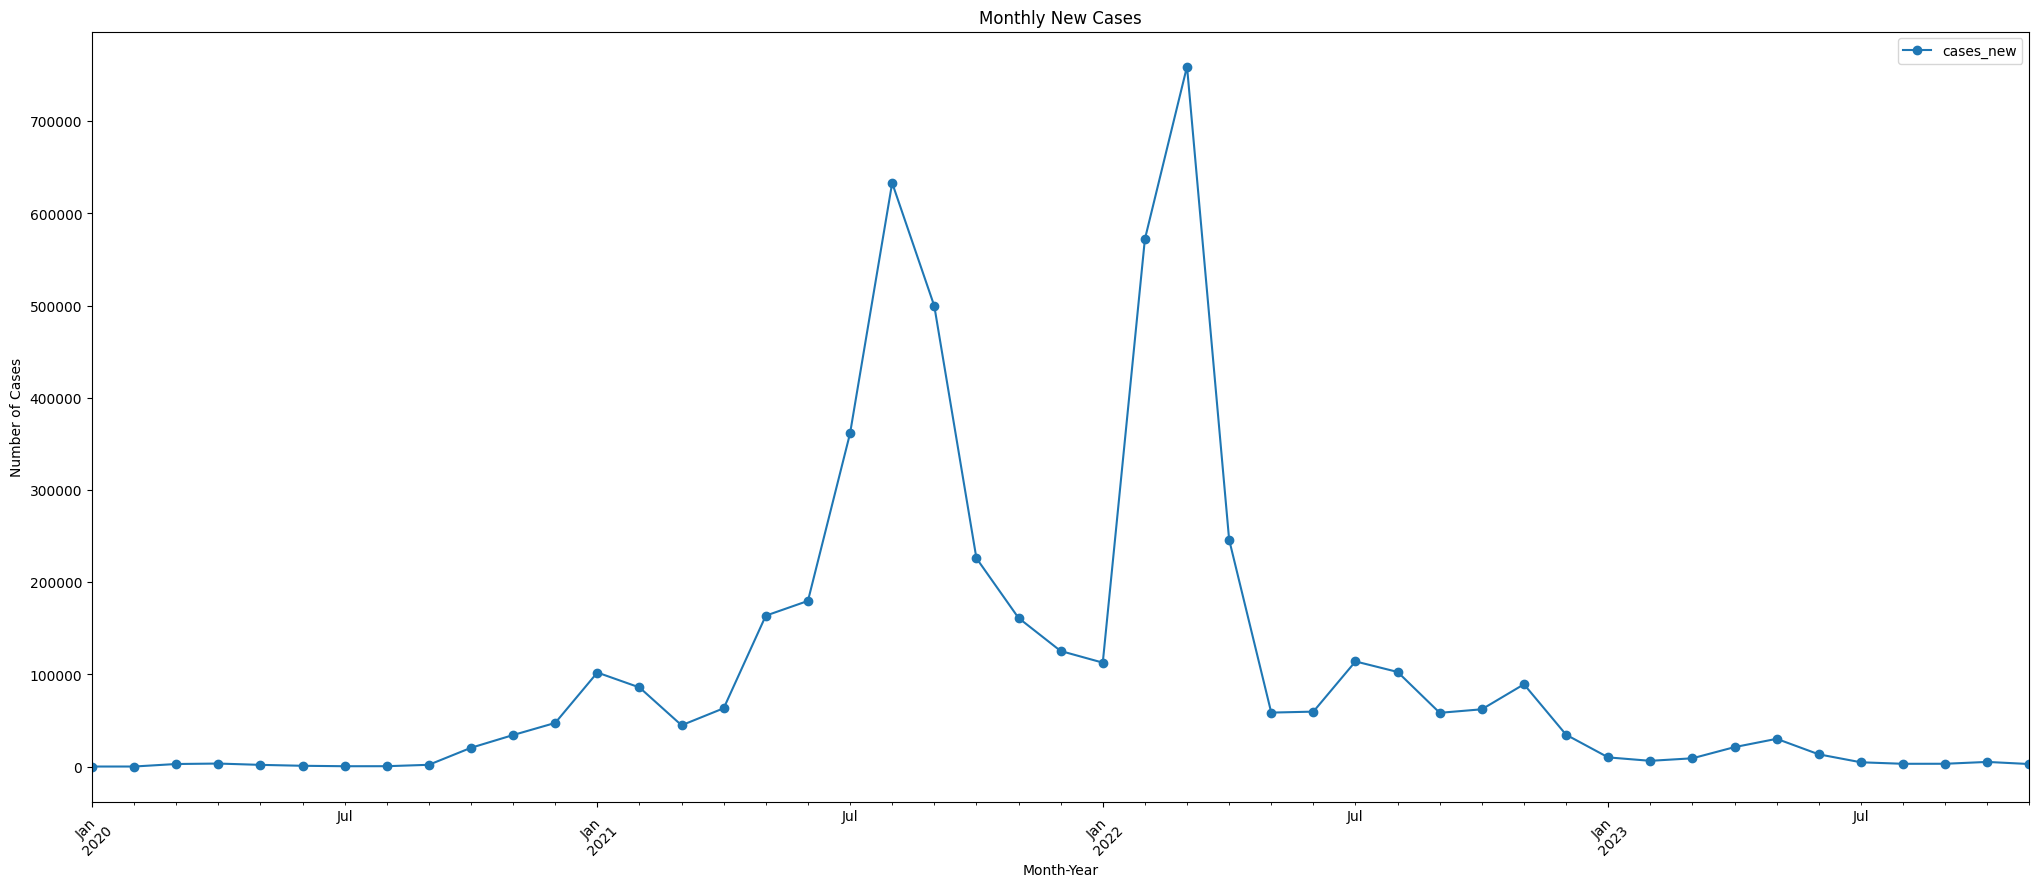

In [28]:
plt.figure(figsize=(25, 10))

agg_df.plot('month_year', 'cases_new', marker='o', linestyle='-', ax=plt.gca())
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.title('Monthly New Cases')

plt.xticks(rotation=45)

plt.show()

Answer : There is no apparent trend for the number of new cases. However, we can see increase of new cases happen suddenly twice from July until September of 2021 and February until March of 2022

9. What is your inference about the active cases during the 4 years period in Malaysia?

In [ ]:
agg_month_df = df

In [30]:
agg_month_df['date'] = pd.to_datetime(agg_month_df['date'], format='%d/%m/%Y')
agg_month_df['year'] = agg_month_df['date'].dt.to_period('Y')

agg_month_df = df.groupby('year').agg({
    'cases_new': 'sum',
    'cases_import': 'sum',
    'cases_recovered': 'sum',
    'cases_active': 'sum',
    'cases_cluster': 'sum',
    'cases_unvax': 'sum',
    'cases_pvax': 'sum',
    'cases_fvax': 'sum',
    'cases_boost': 'sum',
    'cases_child': 'sum',
    'cases_adolescent': 'sum',
    'cases_adult': 'sum',
    'cases_elderly': 'sum',
    'cases_0_4': 'sum',
    'cases_5_11': 'sum',
    'cases_12_17': 'sum',
    'cases_18_29': 'sum',
    'cases_30_39': 'sum',
    'cases_40_49': 'sum',
    'cases_50_59': 'sum',
    'cases_60_69': 'sum',
    'cases_70_79': 'sum',
    'cases_80': 'sum'
}).reset_index()

In [34]:
agg_month_df

,year,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020,113010,2073,88940,1203957,66422,113010,0,0,0,...,2884,4556,4883,35244,29086,14495,8560,4605,1341,441
1,2021,2645076,6228,2596432,31643749,424516,1577401,394457,665352,7866,...,144195,217740,177010,676272,551108,335263,235857,153411,63890,22891
2,2022,2268591,30234,2292444,25553932,38752,319876,41097,696081,1211537,...,110241,152937,134803,592894,533801,315596,199175,126716,61319,30429
3,2023,107726,423,108993,3738419,2238,12449,512,20774,73991,...,2610,3492,5954,25598,27907,16358,8971,5992,4660,6184


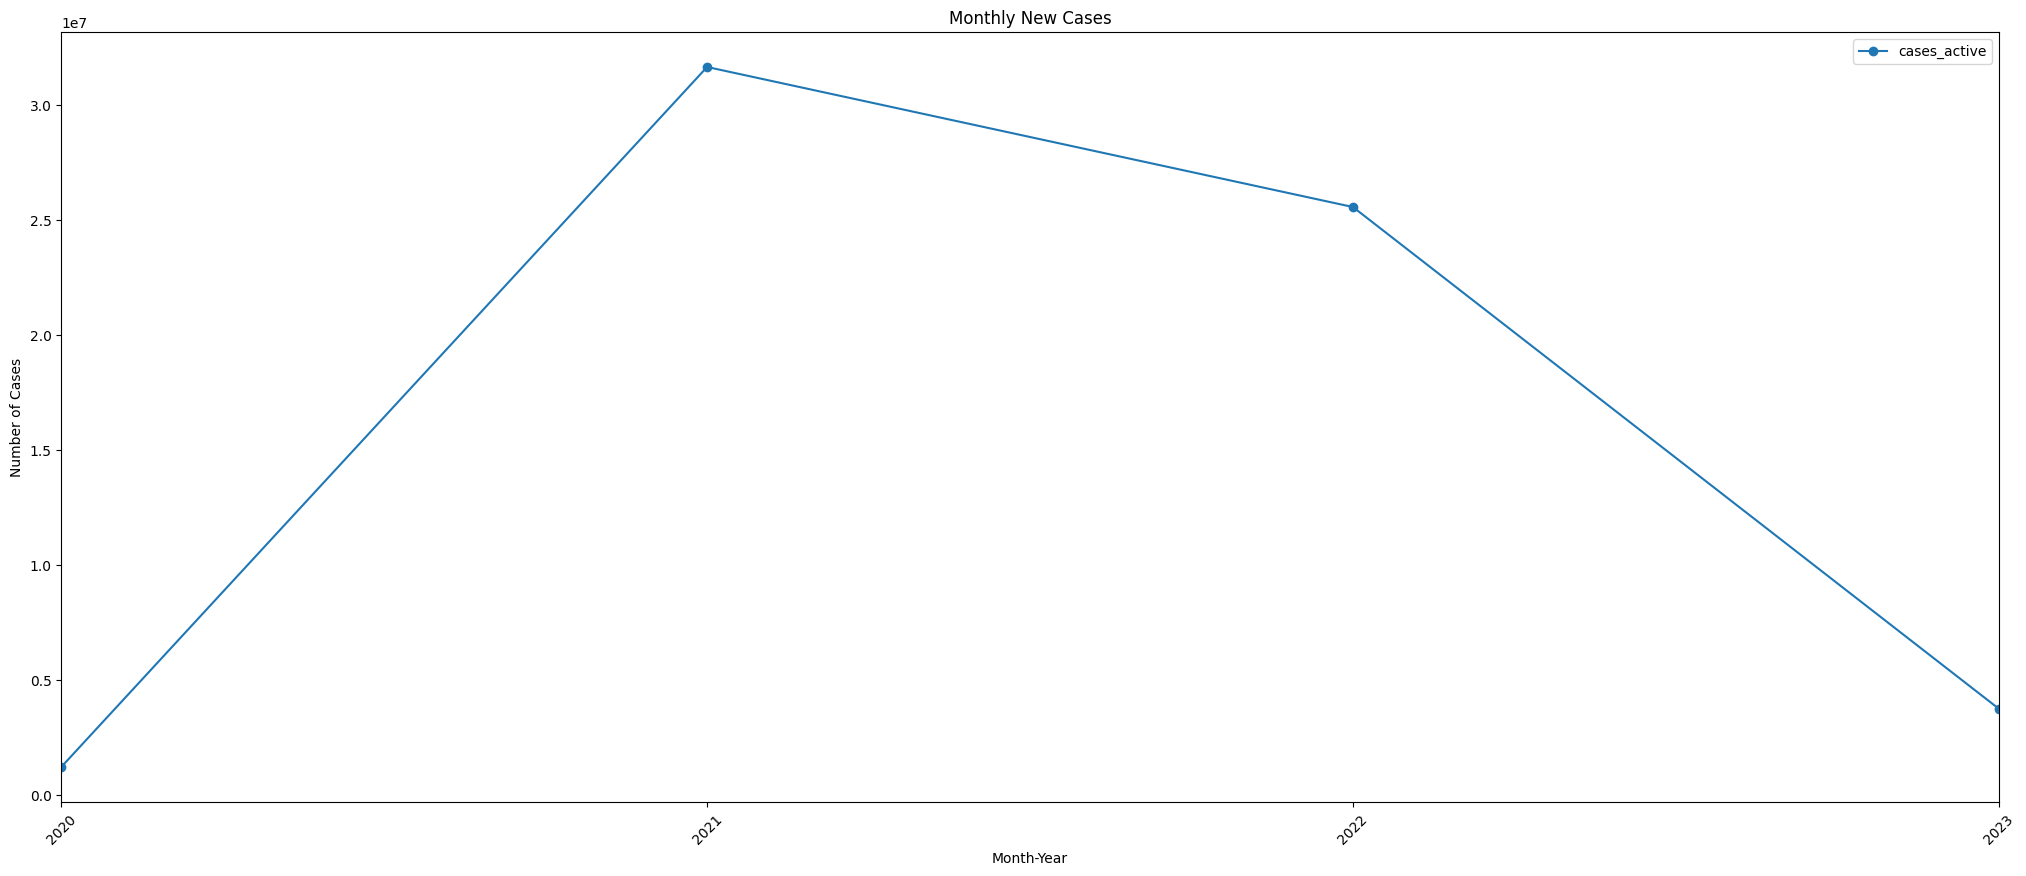

In [35]:
plt.figure(figsize=(25, 10))

agg_month_df.plot('year', 'cases_active', marker='o', linestyle='-', ax=plt.gca())
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.title('Monthly New Cases')

plt.xticks(rotation=45)

plt.show()

Answer : Base on the line chart, we can see that there is a very high spike of number of active cases from 2020 to 2021. This is the case probably because in 2020 there is no vaccine and booster yet. This is also probably why the number of active cases starts to decrease significantly from 2022 to 2023 since most people are finally getting vaccines and booster shots.

10.